In [12]:
from imports import *
sns.set_style("whitegrid")

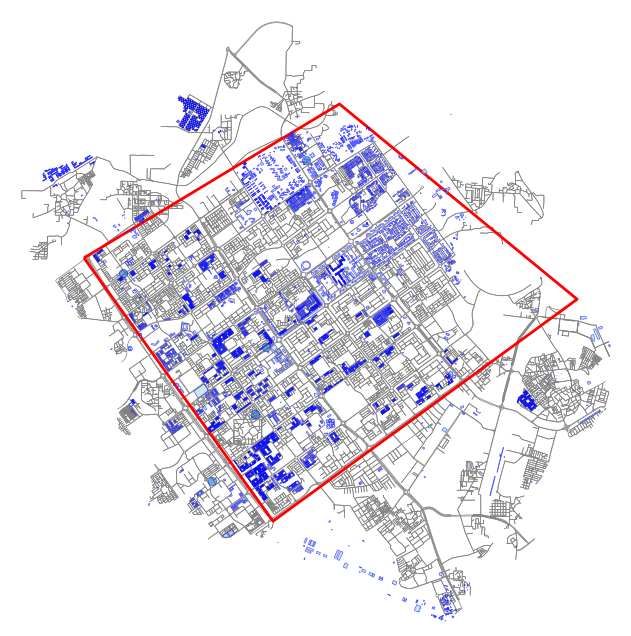

In [6]:
# Step 1: Get a base map (road network) of Chandigarh
place = "Chandigarh, India"
G = ox.graph_from_place(place, network_type="drive")

# Step 2: Get building footprints
tags = {"building": True}
buildings = ox.features.features_from_place(place, tags)

"""
bottom left - 30.743238, 76.721490
bottom right - 30.688879, 76.766889
top left - 30.775032, 76.782861
top right - 30.742677, 76.831495
"""

bbox_polygon = Polygon([(76.721490, 30.743238), (76.766889, 30.688879), (76.839948, 30.734717), (76.782861, 30.775032)])
bbox_gdf = gpd.GeoDataFrame(geometry=[bbox_polygon], crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(8, 8))
ox.plot_graph(G, ax=ax, node_size=0, edge_color="gray", edge_linewidth=0.5, show=False)
bbox_gdf.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=2)

buildings.plot(ax=ax, facecolor="lightblue", edgecolor="blue", linewidth=0.5, alpha=0.6)

plt.show()


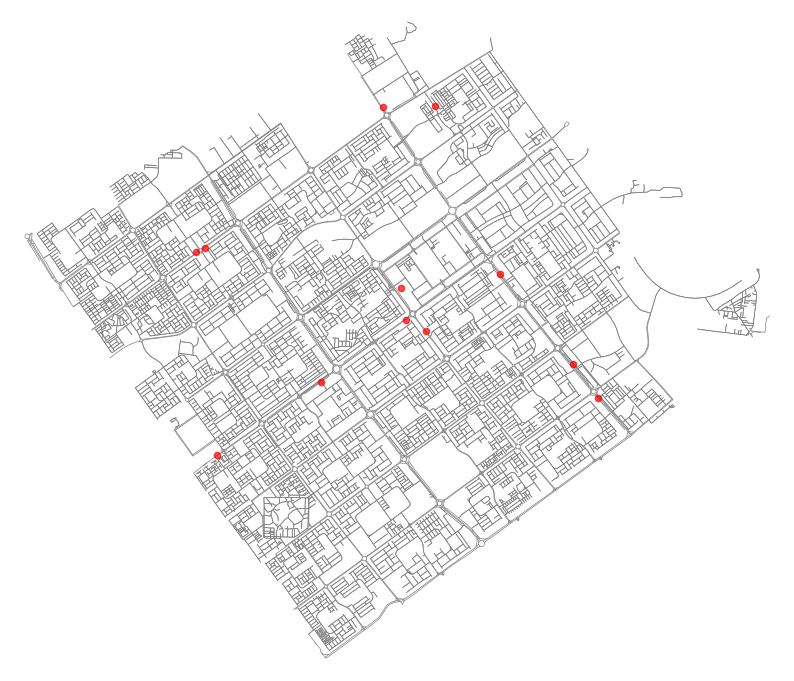

In [7]:
reduced_area = ox.graph_from_polygon(bbox_polygon, network_type='drive')

tags = {
    'highway': 'bus_stop', 
    # 'public_transport': ['stop_position', 'platform', 'station'],
    # 'amenity': 'bus_station'
    }

public_trasport_features = ox.features_from_polygon(bbox_polygon, tags=tags)
public_transport_features = public_trasport_features.set_crs("EPSG:4326")

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
ox.plot_graph(reduced_area, ax=ax, node_size=0, edge_color="gray", edge_linewidth=0.5, show=False)
public_transport_features.plot(ax=ax, color="red", markersize=20, alpha=0.7)
plt.show()

---
**9th March**

- AQI Data from sector 22
- Bus Stops Around Sector 22



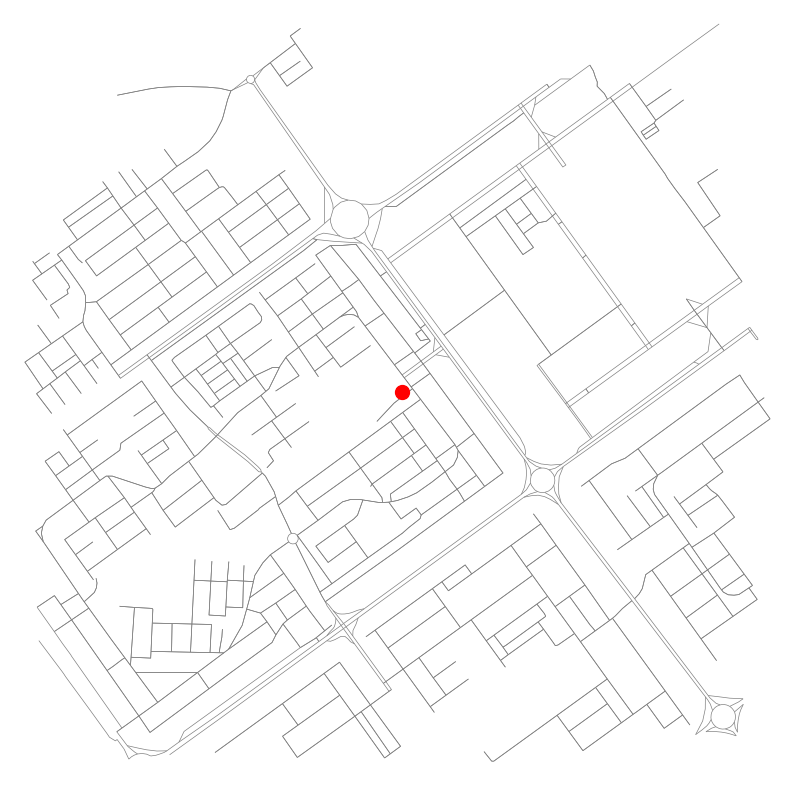

In [9]:
# Define the point and buffer distance
point = (30.735567, 76.775714)
buffer_dist = 1000  # in meters

# Get the graph within the buffer distance
buffer_graph = ox.graph_from_point(point, dist=buffer_dist, network_type='drive')

# Plot the graph and buffer
fig, ax = plt.subplots(figsize=(10, 10))
ox.plot_graph(buffer_graph, ax=ax, node_size=0, edge_color="gray", edge_linewidth=0.5, show=False)
ax.scatter(point[1], point[0], s=100, color='red', zorder=5)

plt.show()

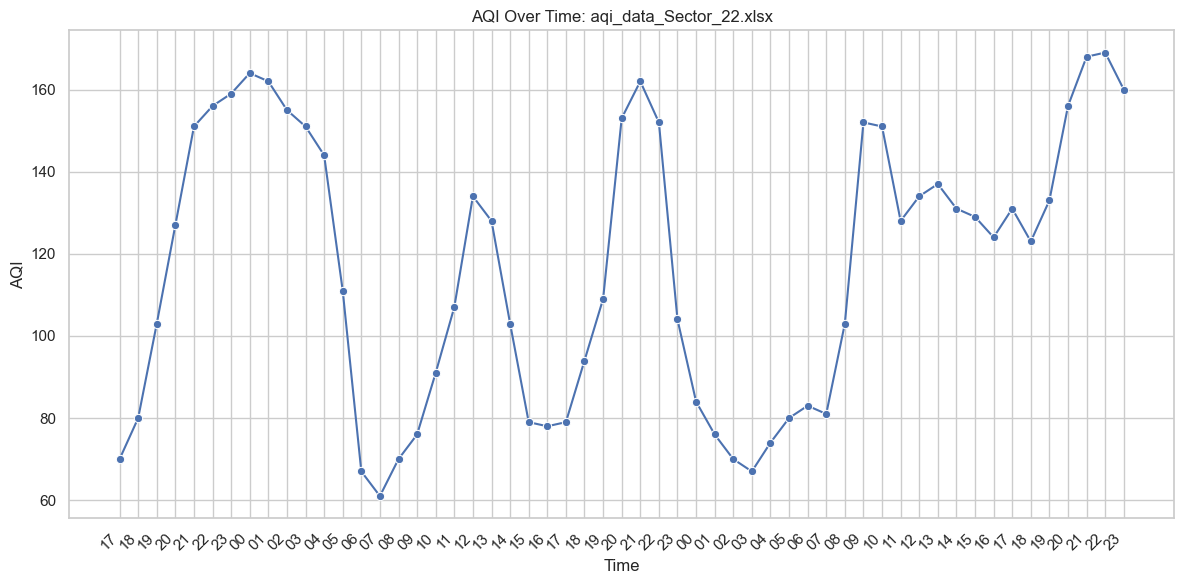

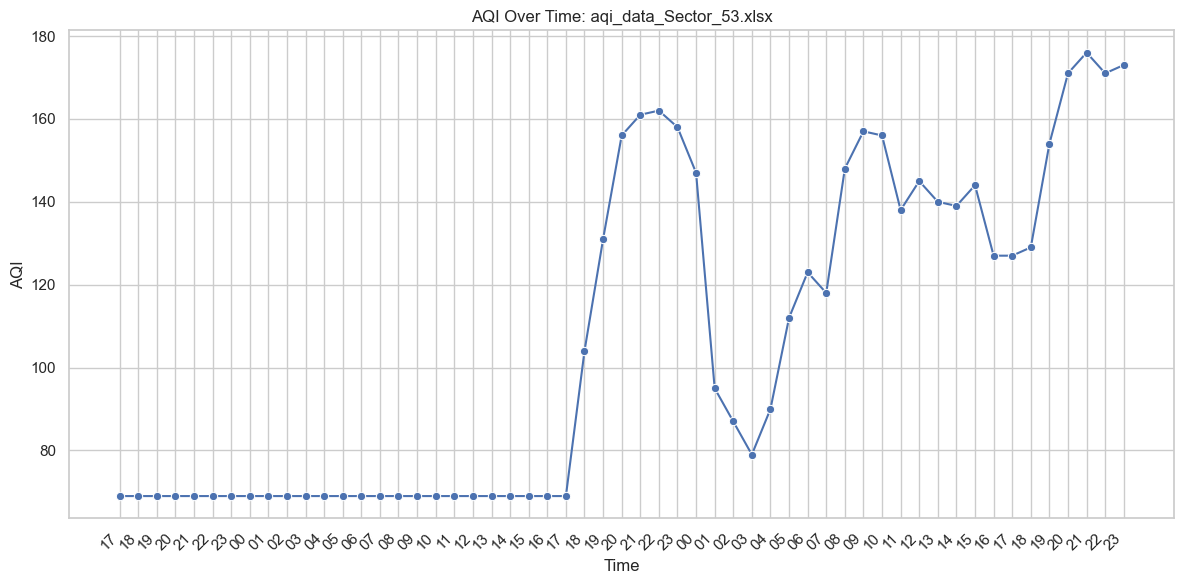

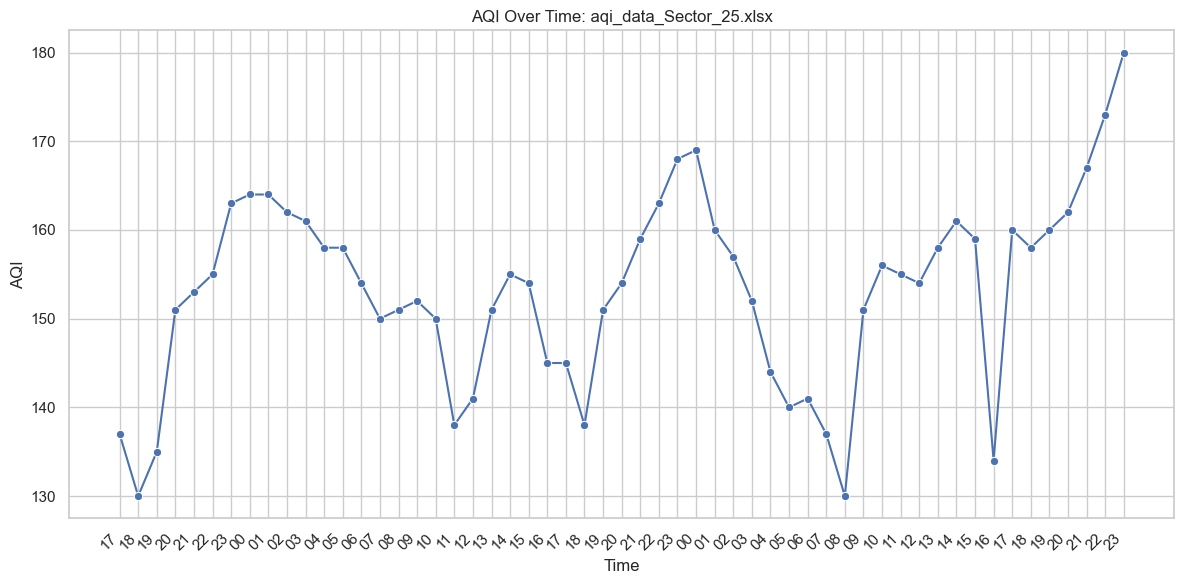

In [11]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Folder containing AQI datasets
folder_path = "../aqi_data"

# Get all Excel files in the folder
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# Handle case where no files are found
if not excel_files:
    print("No Excel files found in the folder.")
    exit()

# Define the date range for filtering
start_date = "2025-03-08"
end_date = "2025-03-11"

# Plot AQI data for each file separately
for file in excel_files:
    file_path = os.path.join(folder_path, file)

    # Load data
    df = pd.read_excel(file_path)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Filter data for 9th March to 10th March
    df = df[(df['Timestamp'] >= start_date) & (df['Timestamp'] < end_date)]

    # If no data is left after filtering, skip this file
    if df.empty:
        print(f"No data in the given range for {file}. Skipping...")
        continue

    # Create a new figure for each dataset
    plt.figure(figsize=(12, 6))

    # Plot AQI over time
    sns.lineplot(x=df['Timestamp'], y=df['AQI'], marker="o")

    # Formatting
    plt.title(f'AQI Over Time: {file}')
    plt.ylabel('AQI')
    plt.xlabel('Time')

    # Show only hour (HH) on x-axis
    plt.xticks(df['Timestamp'], df['Timestamp'].dt.strftime('%H'), rotation=45, ha='right')

    # Display the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()


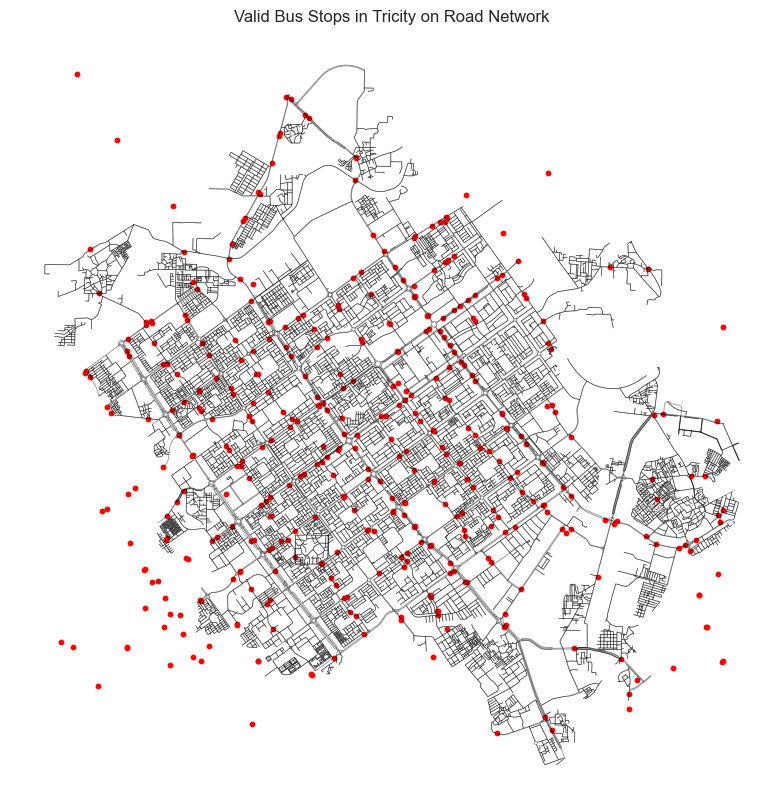

In [36]:
place_names = ["Chandigarh, India", "Mohali, India"]
graph = ox.graph_from_place(place_names, network_type="drive")
gdf_edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)


df = pd.read_csv("../scarping_scripts/scarped_data/processed_data/bus_stop_locations.csv")
gdf_stops = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["long"], df["lat"]), crs="EPSG:4326")
gdf_stops = gdf_stops[["name", "geometry"]]


minx, miny, maxx, maxy = gdf_edges.total_bounds  # (xmin, ymin, xmax, ymax)
gdf_stops_filtered = gdf_stops[
    (gdf_stops.geometry.x >= minx) & (gdf_stops.geometry.x <= maxx) &
    (gdf_stops.geometry.y >= miny) & (gdf_stops.geometry.y <= maxy)
]

fig, ax = plt.subplots(figsize=(10, 10))
gdf_edges.plot(ax=ax, linewidth=0.5, color="black", alpha=0.5)  # Plot road network
gdf_stops_filtered.plot(ax=ax, color="red", markersize=10)

plt.grid('off')
plt.axis('off')
plt.title("Valid Bus Stops in Tricity on Road Network")
plt.show()